In [1]:
# stan implementation
import pystan
%pylab inline
from scipy.special import polygamma as pg

Populating the interactive namespace from numpy and matplotlib



Bad key "axes.color_cycle" on line 250 in
/home/matus/Desktop/matustools/matplotlibrc.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distribution


# Notation

$Y$ generic random variable

$U$ latent random variable

$V$ residual random variable

$X$ predictor
### Parameters
$\eta$ and $\nu$ generic parameters

$\mu=E[Y]$ mean parameter

$\gamma=E[\log Y]$ geometric mean parameter

$\sigma^2=E[(Y-\mu)^2]$ standard deviation parameter

$Y=\alpha+U$ shift parameter

$Y= U/\theta$ scale parameter

$Y= U \lambda$ inverse-scale (rate) parameter

$Y=e^{-\tau} U$ log-scale parameter

$Y=U^\kappa$ exponent parameter

$Y=f(U,\rho)$ shape parameter

$Y=\alpha + \beta X$ linear predictor

$\psi$ digamma function

$\pi$ pi number

$\phi$ measurement scale

$\delta$ dirac function

$\zeta,\epsilon,\varepsilon,\vartheta,\iota,\xi,\varpi,\varrho,\varsigma,\varphi,\chi,\omega$

## Gamma distribution

Paremeters $\eta$ and $\nu$ are orthogonal if 

$$\operatorname{E}_Y
\left[
 \frac{\partial \log f(Y;\eta,\nu)}{\partial\eta \ \partial\nu}
 \right]=0$$

The probability density function of Gamma distribution parametrized by shape parameter $\rho$ and scale parameter $\theta$ is
$$f(Y=y;\rho,\theta)=\frac{1}{\Gamma(\rho) \theta^\rho} y^{\rho - 1} e^{-\frac{y}{\theta}}$$

with Fisher information 

$$I_{\rho \theta} =  \begin{pmatrix}  
\psi'(\rho) & \theta^{-1} \\
\theta^{-1} & \rho \theta^{-2} \end{pmatrix} $$

Consider parametrization in terms of logarithm of geometric mean $\gamma=E[\log Y]=\psi(\rho)+\log \theta$ and log-scale $\tau=\log(\theta)$, where $\psi$ is the digamma function. Then the logarithm of density function parametrized by $\gamma$ and $\tau$ is

$$\log f(Y=y;\gamma,\tau)=-\log{\Gamma(\omega(\gamma-\tau)) -\tau \omega(\gamma-\tau) + (\omega(\gamma-\tau)-1)\log y- y e^{-\tau}}$$

where we use $\omega$ to label the inverse digamma function. By $\omega'(y)$ $\omega''(y)$ and  we denote the first and second derivative of inverse digamma function with respect to $y$. Next, we compute the first derivative of the log-density with respect to $\gamma$:

$$\begin{align} \frac{\partial}{\partial\gamma}\log f(Y;\gamma,\tau) &= -\psi(\omega(\gamma-\tau)) \omega'(\gamma-\tau)-\tau \omega'(\gamma-\tau) + \omega'(\gamma-\tau) \log y \\
&= -(\gamma-\tau) \omega'(\gamma-\tau)-\tau \omega'(\gamma-\tau) + \omega'(\gamma-\tau) \log y \\
&= (\log y - \gamma)\omega'(\gamma -\tau)\end{align}$$

Next we obtain derivative with respect to $\gamma$ and $\tau$:

$$\begin{align} \frac{\partial}{\partial\gamma \partial\tau}\log f(Y;\gamma,\tau) &= \frac{\partial}{\partial\tau}\left[(\log y - \gamma)\omega'(\gamma -\tau)\right]\\
&= (\gamma-\log y)\omega''(\gamma-\tau)
\end{align}$$

Finally, compute the expectation
$$\begin{align} \operatorname{E}_Y
\left[
 \frac{\partial \log f(Y;\tau,\gamma)}{\partial\tau\ \partial\gamma}
 \right]&= \operatorname{E}\left[\omega''(\gamma-\tau)(\gamma-\log y)\right] \\
 &=\omega''(\gamma-\tau)(\gamma-\operatorname{E}[\log y])\\
 &=\omega''(\gamma-\tau)(\gamma-\gamma)\\
 &=0
\end{align}$$

Note that $\operatorname{E}[\log y]$ is the logarithm of geometric mean and hence $\operatorname{E}[\log y]=\gamma$

$$I_{\gamma \tau} =  \begin{pmatrix}  
\omega'(\gamma-\tau) & 0\\
0 & \omega(\gamma-\tau)-\omega'(\gamma-\tau)\end{pmatrix} $$

$$I_{\rho \tau} =  \begin{pmatrix}  
\psi'(\rho) & 1 \\
1 & \rho \end{pmatrix} $$

$$I_{\rho, \tau+\log \rho} =  \begin{pmatrix}  
\psi'(\rho)-1/\rho & 0 \\
0 & \rho \end{pmatrix} $$

$$I_{\psi(\rho), \tau} =  \begin{pmatrix}  
\psi'(\rho)^{-1} & \psi'(\rho)^{-1} \\
\psi'(\rho)^{-1} & \rho \end{pmatrix} $$

$$I_{\psi(\rho)+\tau, \tau} =  \begin{pmatrix}  
\psi'(\rho)^{-1} & 0 \\
0& \rho-\psi'(\rho)^{-1} \end{pmatrix} $$

In [2]:
model = """
data {
    int<lower=0> N; //nr subjects
    real<lower=0> k;
    real<lower=0> t;
}generated quantities{
    real<lower=0> y;
    y=gamma_rng(k,1/t);
}
"""
smGammaGen = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_56e71184937d3586a66635dbe41869eb NOW.


In [3]:
model = """
data {
    int<lower=0> N; //nr subjects
    real<lower=0> y[N];
}parameters{
    real<lower=0> k;
    real<lower=0> t;
}model{
    for (n in 1:N)
        y[n]~gamma(k,1/t);
}
"""
smGamma = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_b8b2a451eabaf76e034fac0e9eb791d9 NOW.


(1000,)
Inference for Stan model: anon_model_bbad6202c899cdc759f507ff65d23dfa.
4 chains, each with iter=2000; warmup=1000; thin=2; 
post-warmup draws per chain=500, total post-warmup draws=2000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
k     10.47    0.02   0.45   9.63  10.15  10.45  10.77   11.4    808    1.0
t    4.4e-5  6.8e-8 1.9e-6 4.0e-5 4.2e-5 4.4e-5 4.5e-5 4.7e-5    771    1.0
lp__ 7473.5    0.03   0.97 7470.9 7473.1 7473.8 7474.2 7474.5    938    1.0

Samples were drawn using NUTS at Wed Aug 12 14:20:28 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


0.00020257241820407322

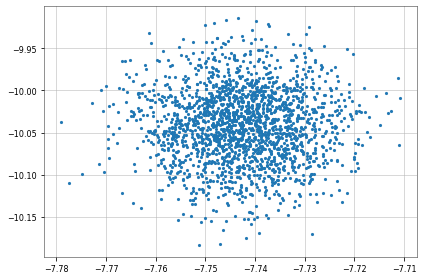

In [90]:
N=1000
fit=smGammaGen.sampling(data={'N':N,'k':10,'t':np.exp(-10)},
    chains=1,n_jobs=1,seed=1,thin=1,iter=N,warmup=0,algorithm="Fixed_param")
w=fit.extract()
y=w['y']
print(y.shape)

fit=smGamma.sampling(data={'N':N,'y':y},
    chains=4,n_jobs=4,seed=1,thin=2,iter=2000,warmup=1000)
print(fit)
w=fit.extract()
t=np.log(w['t'])
g=pg(0,w['k'])+t
w=fit.extract()
plt.plot(g,t,'.')
np.corrcoef(g,t)[0,1]

In [4]:
invgammafun='''functions{
    vector invdigamma(vector x){
        vector[num_elements(x)] y; vector[num_elements(x)] L;
        for (i in 1:num_elements(x)){
            if (x[i]==digamma(1)){ 
                y[i]=1;
            }else{ if (x[i]>=-2.22){
                y[i]=(exp(x[i])+0.5);
            }else{
                y[i]=1/(x[i]-digamma(1));
        }}}
        L=digamma(y)-x;
        while (min(L)>10^-12){
            y=y-L ./trigamma(y);
            L=digamma(y)-x;
        }
        return y;}
    real invdigammaR(real x){
        real y; real L;
        if (x==digamma(1)){ 
            y=1;
        }else{ if (x>=-2.22){
            y=(exp(x)+0.5);
        }else{
            y=1/(x-digamma(1));
        }}
        L=digamma(y)-x;
        
        while (abs(L)>1e-5){
            y=y-L ./trigamma(y);
            L=digamma(y)-x;
        }
        return y;
    }} '''
model = """
data {
    int<lower=0> N; //nr subjects
    real<lower=0> y[N];
}parameters{
    real<lower=-100,upper=100> g;
    real<lower=-100,upper=100> t;
}transformed parameters{
    real k;
    k=invdigammaR(g-t);
}model{
    for (n in 1:N)
        y[n]~gamma(k,exp(-t));
}
"""
smGammaGeom = pystan.StanModel(model_code=invgammafun+model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_73d022c146ed724ba4b8072e7a8ef172 NOW.


In [10]:
N=10
fit=smGammaGen.sampling(data={'N':N,'k':1,'t':np.exp(0)},
    chains=1,n_jobs=1,seed=1,thin=1,iter=N,warmup=0,algorithm="Fixed_param")
w=fit.extract()
y=w['y']

fit=smGammaGeom.sampling(data={'N':N,'y':y},
    chains=4,n_jobs=4,seed=2,thin=1,iter=500,warmup=200)
#control={'adapt_delta':0.99})
print(fit)

KeyboardInterrupt: 

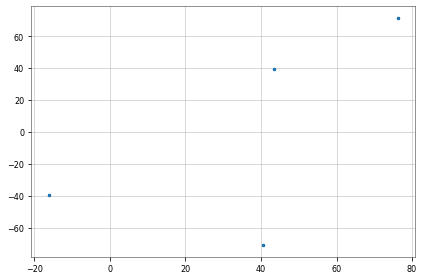

In [8]:
w=fit.extract()
#plt.plot(pg(0,w['k']),w['g']-w['t'],'.')
#np.max(np.abs(pg(0,w['k'])-w['g']+w['t']))
plt.plot(w['g'],w['t'],'.')

# Hierarchical parameter recovery

In [29]:
model = """
data {
    int<lower=0> N; //nr subjects
    int<lower=0> M;
    real gm;
    real gs;
    real t;
}generated quantities{
    real g[N];
    real<lower=0> y[N,M];
    for (n in 1:N){
        g[n]=normal_rng(gm,gs);
        for (m in 1:M){
            y[n,m]=gamma_rng(invdigammaR(g[n]-t),exp(t));
}}}
"""
smGammaGen = pystan.StanModel(model_code=invgammafun+model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_0f1c4cd5a7a2dd5bfc3c53aaa88ff7a5 NOW.


In [71]:
N=10;M=20
fit=smGammaGen.sampling(data={'N':N,'M':M,'gm':5,'gs':2,'t':1},
    chains=4,n_jobs=4,seed=1,thin=1,iter=30,warmup=0,algorithm="Fixed_param")
w=fit.extract()
y=w['y'][0,:,:]
print(y.shape)

(10, 20)


In [69]:
model = """
data {
    int<lower=0> N; //nr subjects
    int<lower=0> M;
    real<lower=0> y[N,M];
}parameters{
    real g[N];
    real gm;
    real<lower=0> gs;
    real t;
}model{
    for (n in 1:N){
        g[n]~normal(gm,gs);
        for (m in 1:M){
            y[n,m]~gamma(invdigammaR(g[n]-t),exp(t));
}}}
"""
smGamma = pystan.StanModel(model_code=invgammafun+model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f6a8758085290b91fe0fd36fc35263d5 NOW.


In [ ]:
fit=smGamma.sampling(data={'N':N,'M':M,'y':y},
    chains=4,n_jobs=4,seed=2,thin=1,iter=1000,warmup=500)
print(fit)

Populating the interactive namespace from numpy and matplotlib


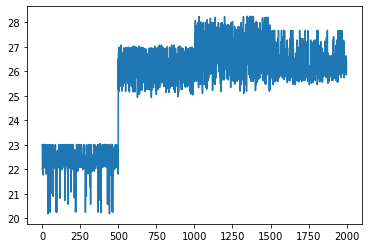

In [55]:
%pylab inline
plt.plot(w['gm'])

## Weibull distribution
$$f(y)=\frac{\kappa}{y}\left(\frac{y}{\theta}\right)^{\kappa}e^{-\left(\frac{y}{\theta} \right)^\kappa}$$

$$I_{\theta \kappa} = \begin{pmatrix}  
\frac{\kappa^2}{\theta^2} & -\frac{\psi(2)}{\theta}\\
. & \frac{1}{\kappa^2}\left(\psi'(1)+\psi(2)^2\right)\end{pmatrix} $$

$E[\log Y]= \log \theta + \psi(1)/\kappa$

$E[Y^s]=\theta^s \Gamma(1+s/\kappa)$

$E[Y^\kappa]=\theta^\kappa $

$\mathrm{Var}[\log Y]=\psi'(1)/\kappa^2$

$E[(Y/\theta)^\kappa]=1$

$\mathrm{Var}[(Y/\theta)^\kappa]=1$

$E[\log (Y/\theta^\kappa)]= \psi(1)$

$E[\log^2 (Y/\theta^\kappa)]= \psi'(1)+\psi(1)^2$

$E[(Y/\theta)^\kappa \log (Y/\theta)^\kappa ]= \psi(2)= \psi(1)+1$

$E[(Y/\theta)^\kappa \log^2(Y/\theta)^\kappa ]= \psi'(2)+\psi(2)^2$

$$I_{\tau \kappa} = \begin{pmatrix}  
\kappa^2 & - \psi(2)\\
. & \frac{1}{\kappa^2}\left(\psi'(1)+\psi(2)^2\right)\end{pmatrix} $$
$\tau=\log \theta$

$r_{\tau \kappa}=\psi(2)/\sqrt{\psi'(1)+\psi(2)^2}=0.31$

This is orthogonal parametrization 

$$\kappa= \frac{1}{\xi-H \tau}$$
$$\xi=\frac{1}{\kappa}+H \tau $$

$H=\frac{\psi(2)}{\psi'(1)+\psi(2)^2}=0.232$

$$I_{\tau \xi} = \frac{H}{(\xi-\tau)^{2}} \begin{pmatrix}  
\left(1+\frac{\psi(2)^2}{\psi'(1)}\right)^{-1} &0 \\
. & \left(1+\frac{\psi'(1)}{\psi(2)^2}\right)^{-1} \end{pmatrix} $$

$$I_{\tau \kappa} = \begin{pmatrix}  
\kappa^2 & - \psi(2)\\
. & \frac{1}{\kappa^2}\left(\psi'(1)+\psi(2)^2\right)\end{pmatrix} $$

$$I_{\tau,1/\kappa} =\kappa^{2} \begin{pmatrix}  
1 & \psi(2)\\
. & \psi'(1)+\psi(2)^2\end{pmatrix} $$

$$I_{\tau,1/\kappa-H\tau} =\kappa^{2} \begin{pmatrix}  
1-\psi(2) H& 0\\
. & \psi'(1)+\psi(2)^2\end{pmatrix} = \kappa^{2} \begin{pmatrix}  
0.902 & 0\\
. & 1.824\end{pmatrix}$$

$$I_{\tau,H\kappa} =\begin{pmatrix}  
\kappa^{2} & \psi(2) H\\
. & \kappa^{-2} \psi(2) H\end{pmatrix} $$

$$I_{\tau,1/(H\kappa)} =\kappa^{2} H^2 \begin{pmatrix}  
1 & \psi(2) H\\
. & \psi(2) H\end{pmatrix} $$

$$I_{\tau,1/(H\kappa)+\tau} =\kappa^{2} H^2 \begin{pmatrix}  
1-\psi(2) H& 0\\
. & \psi(2) H\end{pmatrix} \\= \kappa^{2} H^2
\begin{pmatrix}  
\left(1+\frac{\psi(2)^2}{\psi'(1)}\right)^{-1} &0 \\
. & \left(1+\frac{\psi'(1)}{\psi(2)^2}\right)^{-1} \end{pmatrix}= \kappa^{2} H^2 \begin{pmatrix}  
0.902 & 0\\
. & 0.098\end{pmatrix}$$
$$I_{\tau,\epsilon} =(\epsilon-\tau)^2\begin{pmatrix}  
\left(1+\frac{\psi(2)^2}{\psi'(1)}\right)^{-1} &0 \\
. & \left(1+\frac{\psi'(1)}{\psi(2)^2}\right)^{-1} \end{pmatrix}$$

Orthogonal from Cox and Reid (1987)

$\epsilon= \exp(\log \theta + \psi(2)/\kappa)=\exp(1/\kappa)\exp(E[\log Y])=\exp E[(Y/\theta)^\kappa \log Y]$

$\theta= \epsilon \exp(-\psi(2)/\kappa)$

In [27]:
1/H

4.313501020391736

$$J_{a/H,b}=\begin{pmatrix} H &0 \\0 & 1 \end{pmatrix}$$

$$J^T \begin{pmatrix}  H^{-2} A &  H^{-1} B \\  H^{-1} B & C \end{pmatrix} J= \begin{pmatrix}  A &B \\B & C\end{pmatrix}$$

$H=B/A$
$$J^T \begin{pmatrix}   A &   B \\  B & C \end{pmatrix} J= \begin{pmatrix}  B^2/A &B^2/A \\B^2/A & C\end{pmatrix}$$

$$J_{a+b,b}=\begin{pmatrix}  1 &-1 \\0 & 1 \end{pmatrix}$$

$$J^T\begin{pmatrix}  A &A \\A & B \end{pmatrix} J= \begin{pmatrix}  A &0 \\0 & B-A\end{pmatrix}$$

$$J_{\log a,b}=\begin{pmatrix}  e^a &0 \\0 & 1 \end{pmatrix}$$

$$J_{\log a,b}^T \begin{pmatrix}  e^{-2a} A & e^{-a} B \\e^{-a} B & C \end{pmatrix} J_{\log a,b}= \begin{pmatrix}  A &B \\B & C\end{pmatrix}$$

$$J_{e^a,b}=\begin{pmatrix}  1/a &0 \\0 & 1 \end{pmatrix}$$

$$J^T \begin{pmatrix}  a^2 A & a B \\ a B & C \end{pmatrix} J= \begin{pmatrix}  A &B \\B & C\end{pmatrix}$$

$$J_{a^{-1},b}=\begin{pmatrix}  -a^{2} &0 \\0 & 1 \end{pmatrix}$$

$$J^T \begin{pmatrix}  a^{-4} A & a^{-2} B \\ a^{-2} B & C \end{pmatrix} J= \begin{pmatrix}  A &-B \\-B & C\end{pmatrix}$$

In [24]:
pg(1,1)

array(1.64493407)

#### old stuff

$$\mathrm{Cov}(\gamma,\phi)=J_{12}J_{11}\frac{\kappa^2}{\theta^2}+J_{21}J_{22}\frac{1}{\kappa^2}\left(\psi'(2)+\psi(2)^2+1\right)-\frac{\psi(2)}{\theta}(J_{12}J_{11}+J_{21}J_{22}+J_{21}J_{12}+J_{11}J_{22})$$

$\theta=e^\phi$

$J_{11}=\frac{\partial \theta}{\partial \phi}=e^\phi=\theta$

$J_{12}=\frac{\partial \theta}{\partial \gamma}=0$

$$\mathrm{Cov}(\gamma,\phi)=J_{21}J_{22}\frac{1}{\kappa^2}\left(\psi'(2)+\psi(2)^2+1\right)-\frac{\psi(2)}{J_{11}}(J_{21}J_{22}+J_{11}J_{22})$$


$$\mathrm{Cov}(\gamma,\phi)=J_{22}\left(J_{21}\frac{1}{\kappa^2}\left(\psi'(2)+\psi(2)^2+1\right)-\psi(2)(J_{21}/J_{11}+1)\right)\\
= J_{21}J_{22}\frac{\psi(2)}{\kappa^2}\left( 
\frac{\psi'(2)+\psi(2)^2+1}{\psi(2)}-\kappa^2\left(\frac{\partial \phi}{\partial \kappa}+e^{-\phi}\right)\right)\\
= J_{21}J_{22}\psi(2)\left( 
\frac{\psi'(2)+\psi(2)^2+1}{\kappa^2\psi(2)}-e^{-\phi}-\frac{\partial \phi}{\partial \kappa}\right)
$$

$\gamma=-\phi- \frac{\psi'(2)+\psi(2)^2+1}{\kappa \psi(2)}$

$\frac{\partial \gamma}{\partial \kappa}= -\frac{\psi'(2)+\psi(2)^2+1}{\kappa^2 \psi(2)}$

$\kappa=-\frac{\psi'(2)+\psi(2)^2+1}{(\gamma+\phi) \psi(2)}$

$\frac{\partial \kappa}{\partial \phi}= \frac{\psi'(2)+\psi(2)^2+1}{(\gamma+\phi)^2 \psi(2)}$

$$\mathrm{Cov}(\gamma,\phi)= J_{21}J_{22}\psi(2)\left( 
\frac{(\gamma+\phi)^2 \psi(2)}{\psi'(2)+\psi(2)^2+1}-e^{-\phi}- \frac{(\gamma+\phi)^2 \psi(2)}{\psi'(2)+\psi(2)^2+1} \right)
$$

$c \mathrm{Ei}(\frac{c}{\kappa})-e^\frac{c}{\kappa}(e^{-\phi}+\kappa)=k$

In [83]:

model = """
data {
    int<lower=0> N; //nr subjects
    vector<lower=0>[N] y;
}parameters {
    real<lower=0> k;
    real<lower=0> t;
}model {
  y~weibull(k,t);
}
"""
smWeibull = pystan.StanModel(model_code=model)

model = """
data {
    int<lower=0> N; //nr subjects
    vector<lower=0>[N] y;
}parameters {
    real t;
    real e;
}model {
  y~weibull(4.313501020391736/(e-t),exp(t));
}
"""
smWeibullE = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_dd507d30f0dad57573a6224c4c01ef6c NOW.


In [12]:
model = """
data {
    int<lower=0> N;
    int<lower=0> M;
    vector<lower=0>[M] y[N];
}parameters {
    real lnk[N];
    real lnt[N];
    real km;real tm;
    real<lower=0> ks;
    real<lower=0> ts;
}model {
    lnk~normal(km,ks);
    lnt~normal(tm,ts);
    for (n in 1:N)
        y[n]~weibull(exp(lnk[n]),exp(lnt[n]));
}
"""
#smWeibullH = pystan.StanModel(model_code=model)

model = """
data {
    int<lower=0> N;
    int<lower=0> M;
    vector<lower=0>[M] y[N];
}parameters {
    real<lower=0> lne[N];
    real lnt[N];
    real em;real tm;
    real<lower=0> es;
    real<lower=0> ts;
}model {
    lne~normal(em,es);
    lnt~normal(tm,ts);
    for (n in 1:N)
        y[n]~weibull(4.313501020391736/(lne[n]),exp(lnt[n]));
}
"""
smWeibullEH = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_3d99857cd395ed26afb9bdf6f6f112d9 NOW.


In [11]:
print(polygamma(0,1))
print(polygamma(0,2))
print(polygamma(1,1))
print(polygamma(1,2))
print(polygamma(1,1)**2)
print(polygamma(1,2)**2)

-0.5772156649015329
0.42278433509846713
1.6449340668482266
0.6449340668482266
2.7058080842778462
0.4159399505813928


<ipython-input-37-9842df651b66>:6: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(e,4.313501020391736/(e-t))
<ipython-input-37-9842df651b66>:6: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(e,4.313501020391736/(e-t))
<ipython-input-37-9842df651b66>:6: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(e,4.313501020391736/(e-t))
<ipython-input-37-9842df651b66>:6: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(e,4.313501020391736/(e-t))
<ipython-input-37-9842df651b66>:6: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(e,4.313501020391736/(e-t))


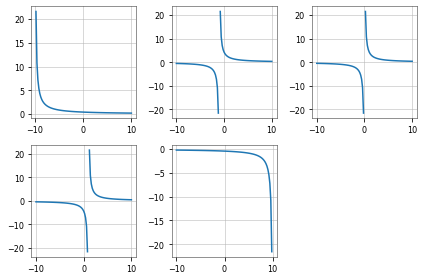

In [37]:
ts=[-10,-1,0,1,10]
k=1
for t in ts:
    plt.subplot(2,3,k);k+=1
    e=np.linspace(-10,10,101)
    plt.plot(e,4.313501020391736/(e-t))

In [76]:
fit.get_adaptation_info()

['# Adaptation terminated\n# Step size = 0.889853\n# Diagonal elements of inverse mass matrix:\n# 0.0492589, 0.380148\n',
 '# Adaptation terminated\n# Step size = 0.791963\n# Diagonal elements of inverse mass matrix:\n# 0.0610601, 0.670636\n',
 '# Adaptation terminated\n# Step size = 0.964206\n# Diagonal elements of inverse mass matrix:\n# 0.0462998, 0.622056\n',
 '# Adaptation terminated\n# Step size = 0.79833\n# Diagonal elements of inverse mass matrix:\n# 0.0554586, 0.539706\n',
 '# Adaptation terminated\n# Step size = 0.840287\n# Diagonal elements of inverse mass matrix:\n# 0.0620329, 0.380415\n',
 '# Adaptation terminated\n# Step size = 0.708001\n# Diagonal elements of inverse mass matrix:\n# 0.0556485, 0.39183\n']

In [8]:
from scipy import stats
def prs(x):
    ts= x.rsplit('\n#')
    out=[ts[1].rsplit('=')[1]]
    out.extend(ts[3][:-2].rsplit(','))
    return out
def computeConvergence(ms,data,reps=50):
    from time import time
    D=[[],[]]
    R=[[],[]]
    for sd in range(reps):  
        print(sd)
        for m in range(len(ms)):
            sm=ms[m]
            t0=time()
            try:
                fit=sm.sampling(data=data,chains=6,n_jobs=6,
                        seed=1,thin=1,iter=1000,warmup=500)
                D[m].append(time()-t0)
                nfo=list(map(prs,fit.get_adaptation_info()) )
                R[m].append(nfo)
            except:
                D[m].append(np.nan)
                R[m].append(np.zeros((6,3))*np.nan)
    D=np.array(D)
    #R=np.float32(R)
    print(np.mean(D,1))
    return D, R

t=-1;e=1
k=4.313501020391736/(e-t)
print('k= ',k)

temp={'y':stats.weibull_min.rvs(k,0,np.exp(t),size=100),'N':100}
#D,R=computeConvergence([smWeibull, smWeibullE])

k=  2.156750510195868


# Hierarchical weibull

In [13]:
N=20
M=50
e=np.random.randn(N)*1+2
t=np.random.randn(N)*1+1
#t=-1;e=1
k=4.313501020391736/(np.abs(e-t))

#print('k= ',k)
data={'y':stats.weibull_min.rvs(k,0,np.exp(t),size=(M,N)).T,'N':N,'M':M}
ms=[smWeibullH, smWeibullEH]
D,R=computeConvergence(ms,data,reps=50)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
[2.06550846 3.78643272]


In [11]:
D

array([[1.03845024, 0.94294357, 1.01578379, 0.99120307, 1.02925539,
        1.01027203, 1.05439496, 1.0273838 , 1.03560948, 1.03058553,
        1.05739832, 1.05801606, 1.06082344, 1.05408597, 1.07381892,
        1.04979825, 1.0801661 , 1.05875039, 1.0076158 , 1.02997637,
        1.04445195, 0.97521567, 1.12239099, 0.96830678, 1.11979413,
        0.96245241, 1.05582952, 0.98207235, 1.06741858, 0.98894548,
        1.03653193, 0.9653337 , 1.05480242, 1.03396964, 1.0364089 ,
        0.97402525, 1.01951122, 1.06045532, 1.08821511, 1.0336051 ,
        1.05263734, 1.06267476, 1.11014342, 1.03312802, 1.05125666,
        1.01969242, 0.99545646, 1.03181911, 1.04430819, 1.05982757],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,    

# Information matrix generalized gamma

$$f(y)=\frac{\kappa}{y \Gamma(\rho)}\left(\frac{y}{\theta}\right)^{\kappa \rho}e^{-\left(\frac{y}{\theta} \right)^\kappa}$$

$$\log f(y)=\log \kappa- \log y -\log \Gamma(\rho) +\kappa \rho \log y - \kappa \rho \log \theta -\left(\frac{y}{\theta} \right)^\kappa$$

$$I_{\rho \theta \kappa} = \begin{pmatrix} \psi'(\rho) & \frac{\kappa}{\theta} &- \frac{\psi(\rho)}{\kappa} \\
. & \frac{\rho \kappa^2}{\theta^2} & -\frac{\rho}{\theta}\psi(\rho+1)\\
. & . & \frac{\rho}{\kappa^2}\left(\psi'(\rho+1)+\psi(\rho+1)^2+\frac{1}{\rho}\right)\end{pmatrix} $$

$\rho (\psi'(\rho+1)+\psi(\rho+1)^2+\frac{1}{k})= \rho \psi'(\rho)+\rho \psi(\rho)^2 + 2\psi(\rho) +1$

$E[\log Y]= \log \theta + \psi(\rho)/\kappa$

$E[Y^s]=\theta^s \Gamma(\rho+s/\kappa)/\Gamma(\rho)$

$E[Y^\kappa]=\theta^\kappa \rho$

$E[Y^\kappa \log Y ]=\theta^\kappa \rho (\log \theta + \psi(\rho+1)/\kappa)= \theta^\kappa (\rho \log \theta + \rho \psi(\rho)/\kappa+1/\kappa)$

$E[\log^2 Y]= \log^2 \theta + 2 \log \theta \psi(\rho)/\kappa+(\psi'(\rho)+\psi(\rho)^2)/\kappa^2$

$E[Y^\kappa \log^2 Y]= \theta^\kappa \rho (\log^2 \theta + 2 \log \theta \psi(\rho+1)/\kappa+(\psi'(\rho+1)+\psi(\rho+1)^2)/\kappa^2)$

$E[Y^{2\kappa} \log^2 Y]= \theta^{2\kappa} (\rho+1) (\log^2 \theta + 2 \log \theta \psi(\rho+2)/\kappa+(\psi'(\rho+2)+\psi(\rho+2)^2)/\kappa^2)$

$\mathrm{Var}[\log Y]=\psi'(\rho)/\kappa^2$

$E[(Y/\theta)^\kappa]=\rho$

$\mathrm{Var}[(Y/\theta)^\kappa]=\rho$

$E[\log (Y/\theta)^\kappa]= \psi(\rho)$

$E[\log^2 (Y/\theta)^\kappa]= \psi'(\rho)+\psi(\rho)^2$

$E[(Y/\theta)^\kappa \log (Y/\theta)^\kappa ]= \rho \psi(\rho+1)= \rho \psi(\rho)+1$

$E[(Y/\theta)^\kappa \log^2(Y/\theta)^\kappa ]= \rho (\psi'(\rho+1)+\psi(\rho+1)^2)$


$$I_{\rho \tau \kappa} = \begin{pmatrix} \psi'(\rho) & \kappa &- \frac{\psi(\rho)}{\kappa} \\
. & \rho \kappa^2 & -\rho\psi(\rho+1)\\
. & . & \frac{\rho}{\kappa^2}\left(\psi'(\rho+1)+\psi(\rho+1)^2+\frac{1}{\rho}\right)\end{pmatrix} $$

$$I_{\rho, \tau, \log \kappa} = \begin{pmatrix} \psi'(\rho) & \kappa &- \psi(\rho) \\
. & \rho \kappa^2 & -\kappa\rho\psi(\rho+1)\\
. & . & \rho \left(\psi'(\rho+1)+\psi(\rho+1)^2+\frac{1}{\rho}\right)\end{pmatrix} $$

$$I_{\rho \tau,1/\kappa} = \begin{pmatrix} \psi'(\rho) & \kappa &- \kappa\psi(\rho) \\
. & \rho \kappa^2 & -\kappa^2 \rho A\\
. & . & \kappa^2 \rho B\end{pmatrix} $$

$$I_{\rho \tau,B/(A \kappa)} = \begin{pmatrix} \psi'(\rho) & \kappa &- \kappa\psi(\rho)A/B \\
. & \rho \kappa^2 & -\kappa^2 \rho A^2/B\\
. & . & \kappa^2 \rho A^2/B\end{pmatrix} $$

$$I_{\rho \tau,B/(A \kappa)-\tau} = \begin{pmatrix} \psi'(\rho) & \kappa-\kappa\psi(\rho)A/B &- \kappa\psi(\rho)A/B \\
. & \rho \kappa^2 & 0\\
. & . & \kappa^2 \rho A^2/B-\rho \kappa^2\end{pmatrix} $$

A=\psi(\rho+1)
B=\left(\psi'(\rho+1)+\psi(\rho+1)^2+\frac{1}{\rho}\right)


$\gamma=\tau+\psi(\rho)/\kappa$

$\rho=\omega(\kappa(\gamma-\tau))=\omega$

$$J=\begin{pmatrix}\kappa \omega' &-\kappa \omega' & (\gamma-\tau)\omega'\\ 0&1 &0 \\ 0& 0& 1 \end{pmatrix}$$
$$I_{\gamma \tau \kappa} = J^T\begin{pmatrix} \frac{1}{\omega'} & \kappa &-(\gamma-\tau) \\
. & \omega \kappa^2 & -(\gamma-\tau)\omega-1\\
. & . & \frac{R}{\kappa^2}\end{pmatrix} J $$

$$I_{\gamma \tau \kappa} = \begin{pmatrix} \kappa^2\omega' &0&0 \\
. & \kappa^2(\omega -\omega')& (\gamma-\tau)(\kappa\omega'-\omega)-1\\
. & . & \frac{R}{\kappa^2}-(\gamma-\tau)^2\omega'\end{pmatrix} $$

with $R=\frac{\omega}{\omega'} +\omega \kappa^2 (\gamma-\tau)^2 + 2\kappa (\gamma-\tau)+1$

## Simplyfied Gamma

$$f(y;\rho)=\frac{ y^{\rho-1} e^{-y}}{\Gamma(\rho)}$$

$$\log f(y;\rho)=\rho \log y -\log y -y-\log \Gamma(\rho)$$

$\Gamma(z+1) = \int_0^\infty x^{z} e^{-x}\, dx$

$\Gamma(z+1)/\Gamma(z)=z$

$\frac{d^n}{dx^n}\Gamma(x) = \int_0^\infty t^{x-1} e^{-t} (\ln t)^n \, dt$

$\psi(x)=\log(\Gamma(x))'=\Gamma'(x)/\Gamma(x)$

$E[Y]= \int_0^\infty y^{\rho} e^{-y}\, dy / \Gamma(\rho)=    \Gamma(\rho+1)/ \Gamma(\rho)=\rho$

$E[Y^s]=\Gamma(\rho+s)/ \Gamma(\rho)$

$\mathrm{Var}[Y]=E[Y^2]-E[Y]^2=\rho(\rho+1)-\rho^2=\rho$

$E[\log Y]=\Gamma'(\rho)/\Gamma(\rho)=\psi(\rho)$

$E[Y \log Y]=\Gamma'(\rho+1)/\Gamma(\rho)= \rho \psi(\rho+1)= \rho \psi(\rho)+1$

$E[1/Y]=    \Gamma(\rho-1)/ \Gamma(\rho)=1/(\rho-1)$

$\mathrm{Var}[1/Y]=E[Y^2]-E[Y]^2=\frac{1}{(\rho-2)(\rho-1)^2}$

$E[\log^2 Y]=\Gamma''(\rho)/\Gamma(\rho)=\psi'(\rho)+\psi(\rho)^2$

use $\psi'(x)=(\Gamma'(x)/\Gamma(x))'=\Gamma''(x)/\Gamma(x)-(\Gamma'(x)/\Gamma(x))^2$

$E[Y \log^2 Y]=\Gamma''(\rho+1)/\Gamma(\rho)=\rho(\psi'(\rho+1)+\psi(\rho+1)^2)=\rho\psi'(\rho)+\rho\psi(\rho)^2+2\psi(\rho)$


# Gengamma with $\theta=1$

$$f(y)=\frac{\kappa}{y \Gamma(\rho)}y^{\kappa \rho} e^{-y^\kappa}$$

$$\log f(y)=\log \kappa- \log y -\log \Gamma(\rho) +\kappa \rho \log y  -y^\kappa$$

$$I_{\rho \kappa} = \begin{pmatrix} \psi'(\rho) & - \frac{\psi(\rho)}{\kappa} \\
. & \frac{\rho}{\kappa^2}\left(\psi'(\rho+1)+\psi(\rho+1)^2+\frac{1}{\rho}\right)\end{pmatrix} $$

$$I_{\rho \log\kappa} = \begin{pmatrix} \psi'(\rho) & - \psi(\rho) \\
. & \rho\psi'(\rho)+\rho\psi(\rho)^2+2\psi(\rho)+1\end{pmatrix} $$

$\gamma=\psi(\rho)/\kappa$

$\rho=\omega(\gamma \kappa)$

$1=d \psi(\omega(\gamma))/d \gamma$

$$I_{\gamma \kappa} = \begin{pmatrix} \kappa^2 \omega(\gamma\kappa) & 0 \\
. & \frac{\omega(\gamma\kappa)}{\kappa\omega'(\gamma\kappa)}+ \omega(\gamma\kappa)\gamma^2\kappa+2\gamma+\frac{1}{\kappa^2}\end{pmatrix} $$

$$I_{\gamma \kappa} = \begin{pmatrix} \kappa^2 \omega(\gamma\kappa) & 0 \\
. & \kappa^{-1}E[Y\log^2 Y]+\frac{1}{\kappa^2}\end{pmatrix} $$

TODO check the last result by transformation of $I_{\rho \kappa}$

orthogonal with 

In [15]:
import pystan
ggcode='''functions{
//' Naive implementation of the generalized Gamma density.
//' @param x Value to evaluate density at.
//' @param alpha Shape parameter.
//' @param beta Scale parameter.
//' @param nu Tail parameter.
real gengamma_pdf(real x, real k, real b, real q) {
  real d;
  d = q/(b*tgamma(k))*(x/b)^(k*q-1) * exp(-(x/b)^q);
  return d;
}


real gengamma_lpdf(real x, real k, real b, real q) {
  real d;
  d = log(q) - log(b) - lgamma(k) +
    (k*q-1)*(log(x) - log(b)) - (x/b)^q;
  return d;
}


real generalized_gamma_cdf(real x, real k, real b, real q) {
  real d;
  d = gamma_p(k, (x/b)^q);
  return d;
}

real generalized_gamma_lcdf(real x, real k, real b, real q) {
  real d;
  d = log(generalized_gamma_cdf(x, k, b, q));
  return d;
}}'''

model = """
data {
    int<lower=0> N; //nr subjects
    vector<lower=0>[N] yLT;
}parameters {
    real k;
    //real b;
    real q;
}model {
    for (n in 1:N)
        yLT[n]~gengamma(exp(k),exp(0),exp(q));
}
"""
smGengamma = pystan.StanModel(model_code=ggcode+model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_50f847b44dc31effb899e4ef907a37a6 NOW.


Inference for Stan model: anon_model_50f847b44dc31effb899e4ef907a37a6.
6 chains, each with iter=10000; warmup=500; thin=1; 
post-warmup draws per chain=9500, total post-warmup draws=57000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
k      0.76  3.6e-4   0.07   0.63   0.72   0.76    0.8   0.88  32877    1.0
q      1.18  3.0e-4   0.06   1.07   1.14   1.18   1.22   1.29  35314    1.0
lp__ -11.01  6.3e-3   1.01 -13.72 -11.39  -10.7 -10.29 -10.02  25750    1.0

Samples were drawn using NUTS at Wed Aug 12 11:59:12 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


-0.6475103790984278

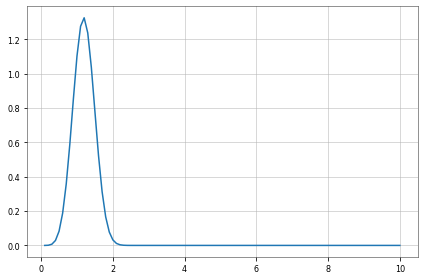

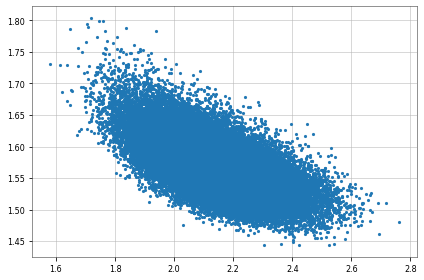

In [37]:
from scipy import stats
x=np.linspace(0,10,101)[1:]
#k,q,0,b
k=2;b=1;q=3;
plt.plot(x,stats.gengamma.pdf(x,k,q,0,b))
temp={'yLT':stats.gengamma.rvs(k,q,0,b,size=100),'N':100}

fit=smGengamma.sampling(data=temp,chains=6,n_jobs=6,
        seed=1,thin=1,iter=10000,warmup=500)
print(fit)
w=fit.extract()
p=np.exp(w['k'])
#b=np.exp(w['b'])
H=(pg(1,p+1)+np.square(pg(0,p+1))+1/p)/pg(0,p+1)
e=H/np.exp(w['q'])+1
plt.figure()
plt.plot(p,e,'.')
np.corrcoef(p,e)[0,1]

(-50, 50)

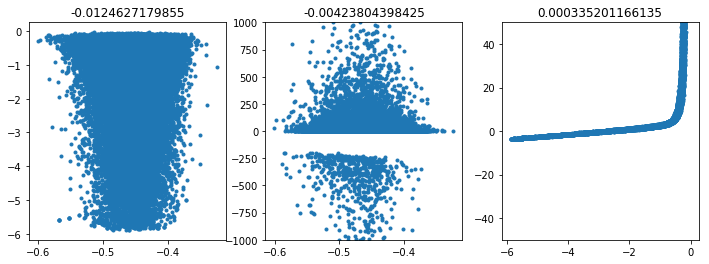

In [30]:
from scipy.special import gamma, digamma,polygamma
plt.figure(figsize=(12,4))
g=np.log(b)+digamma(k)/q
c=(polygamma(1,k+1)+polygamma(0,k+1)**2+1/k)*q/polygamma(0,k+1)+np.log(b)
q1=g
q2=np.log(b)
q3=c
#*np.exp(-a)+q2
plt.subplot(1,3,1)
plt.plot(q1,q2,'.')
plt.title(np.corrcoef(q1,q2)[0,1])
plt.subplot(1,3,2)
plt.plot(q1,q3,'.')
plt.title(np.corrcoef(q1,q3)[0,1])
plt.ylim([-1000,1000])
plt.subplot(1,3,3)
plt.plot(q2,q3,'.')
plt.title(np.corrcoef(q2,q3)[0,1]);
plt.ylim([-50,50])

# Beta distribution

Parameters $\alpha$ and $\beta$ are orthogonal if 

$$\operatorname{E}_X
\left[
 \frac{\partial \log f(X;\alpha,\beta)}{\partial\alpha \ \partial\beta}
 \right]=0$$

The probability density function of Beta distribution parametrized by shape parameters $\alpha$ and $\beta$ is
$$f(X=x;\alpha,\beta)=\frac{ x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha,\beta)}$$

Consider parametrization in terms of logarithm of geometric mean $E[\log X]=\gamma=\psi(\alpha)-\psi(\alpha+\beta)$ and the logarithm of geometric mean of $1-X$: $E[\log (1-X)]=\phi=\psi(\beta)-\psi(\alpha+\beta)$ 

Then the fisher information matrix of the distribution parametrized by shape parameters is

$$I_{\alpha,\beta}=\begin{pmatrix}\psi'(\alpha)-\psi'(\alpha+\beta) & -\psi'(\alpha+\beta)\\
-\psi'(\alpha+\beta) & \psi'(\beta)-\psi'(\alpha+\beta)
\end{pmatrix}$$

Fisher information matrix when parametrized by $\gamma$ and $\phi$ is

$$I_{\gamma,\phi}=J^\mathrm{T} I_{\alpha,\beta} J$$

Where $J$ is the Jacobian matrix defined as

$$J=\begin{pmatrix}\frac{\partial \alpha}{\partial \gamma} & \frac{\partial \alpha}{\partial \phi}\\
\frac{\partial \beta}{\partial \gamma} & \frac{\partial \beta}{\partial \phi}
\end{pmatrix}$$

Note that $I_{\alpha,\beta}$ can be written as:

$$I_{\alpha,\beta}=\begin{pmatrix}\frac{\partial \gamma}{\partial \alpha} & \frac{\partial \phi}{\partial \alpha} \\ \frac{\partial \gamma}{\partial \beta}  & \frac{\partial \phi}{\partial \beta}
\end{pmatrix}$$

$$\mathrm{Cov}(\gamma,\phi)=J_{12}J_{11}\psi'(\alpha)+J_{21}J_{22}\psi'(\beta)-\psi'(\alpha+\beta)(J_{12}J_{11}+J_{21}J_{22}+J_{21}J_{12}+J_{11}J_{22})$$

$\gamma=\psi(\alpha)-\psi(\alpha+\beta)$

$\phi=\psi(\beta)-\psi(\alpha+\beta)$

$\gamma-\phi=\psi(\alpha)-\psi(\beta)$

$\alpha=\omega(\phi-\psi(\beta))-\beta$

$\beta=\omega(\gamma-\psi(\alpha))-\alpha$

$$\gamma=\frac{\partial \log \mathrm{B}(\alpha,\beta)}{\partial \alpha}=\frac{\partial \log \Gamma(\alpha)}{\partial \alpha}-\frac{\partial \log \Gamma(\alpha+\beta)}{\partial \alpha}$$

$$\phi=\frac{\partial \log \mathrm{B}(\alpha,\beta)}{\partial \beta}=\frac{\partial \log \Gamma(\beta)}{\partial \beta}-\frac{\partial \log \Gamma(\alpha+\beta)}{\partial \beta}$$

$\psi'(\alpha)=\psi'(\alpha+\beta)\frac{\partial \beta}{\partial \alpha}  -\frac{1}{J_{11}}$

$\psi'(\beta)=\psi'(\alpha+\beta)\frac{\partial \alpha}{\partial \beta}  -\frac{1}{J_{22}}$

$I_{\alpha,\beta}=\begin{pmatrix}A+C & C \\ C & B+C
\end{pmatrix}$

$J^{-1}=\begin{pmatrix}A+C & C \\ C & B+C \end{pmatrix}$

$I_{\gamma,\phi}=J^\mathrm{T} I_{\alpha,\beta} J= J^\mathrm{T} J^{-1} J=J$

$$J=\frac{1}{AB+BC+AC}\begin{pmatrix}B+C & -C \\ -C & A+C \end{pmatrix}
= \begin{pmatrix}\frac{1}{A+\frac{BC}{B+C}} & -\frac{1}{A+B+\frac{AB}{C}} \\ -\frac{1}{A+B+\frac{AB}{C}} & \frac{1}{B+\frac{AC}{A+C}} \end{pmatrix}$$

$$J_{11}=(A+C)^{-1}$$
$$J_{12}=J_{21}= C^{-1}$$
$$J_{22}=-(B+C)^{-1}$$

$$\frac{J_{11}J_{22}}{J_{12}J_{21}}=1$$

$$\frac{-C^2}{(A+C)(B+C)}=1$$

$$\mathrm{Cov}(\gamma,\phi)=J_{12}J_{11}A+J_{21}J_{22}B+C(J_{12}J_{11}+J_{21}J_{22}+J_{21}J_{12}+J_{11}J_{22})$$

$$\mathrm{Cov}(\gamma,\phi)=\frac{A}{C(A+C)}-\frac{B}{C(B+C)}+\frac{1}{A+C}-\frac{1}{B+C} +\frac{1}{C} +\frac{1}{C}\frac{-C^2}{(A+C)(B+C)}
= \frac{1}{C}\left(\frac{A}{A+C}-\frac{B}{B+C}+\frac{C}{A+C}-\frac{C}{B+C} +1 +1\right)
= \frac{2}{C}$$

In [2]:
import pystan

model = """
data {
    int<lower=0> N; //nr subjects
    vector<lower=0>[N] yLT;
}parameters {
    real a;
    real b;
}model {
    for (n in 1:N)
        yLT[n]~beta(exp(a),exp(b));
}
"""
smBeta = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_bd01f563b8035622229a042f898734bd NOW.


Inference for Stan model: anon_model_bd01f563b8035622229a042f898734bd.
6 chains, each with iter=55000; warmup=5000; thin=4; 
post-warmup draws per chain=12500, total post-warmup draws=75000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a      1.32  6.1e-4   0.14   1.04   1.22   1.32   1.41   1.57  49698    1.0
b      2.64  6.4e-4   0.14   2.35   2.55   2.65   2.74   2.92  49966    1.0
lp__  99.07  4.1e-3    1.0  96.36  98.68  99.38  99.79 100.06  58530    1.0

Samples were drawn using NUTS at Mon Mar 12 20:03:52 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


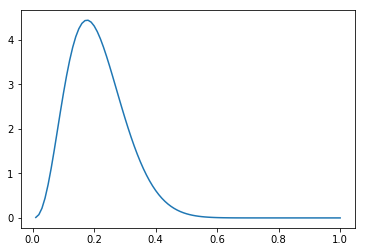

In [48]:
from scipy import stats
x=np.linspace(0,1,101)[1:]
plt.plot(x,stats.beta.pdf(x,4,15,0,1))
temp={'yLT':stats.beta.rvs(4,15,0,1,size=100),'N':100}
fit=smBeta.sampling(data=temp,chains=6,n_jobs=6,
        seed=1,thin=4,iter=55000,warmup=5000)
print(fit)
w=fit.extract()
a=np.exp(w['a'])
b=np.exp(w['b'])

0.45243136720737848

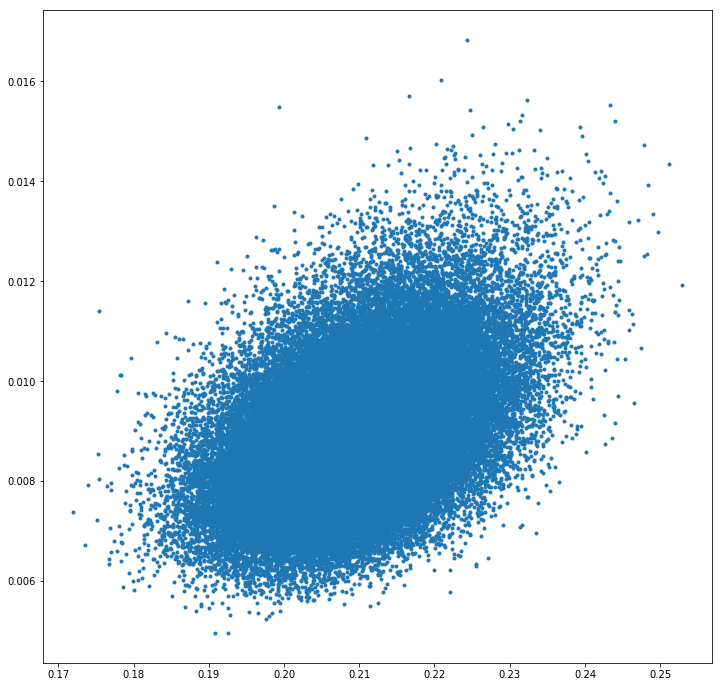

In [54]:
from scipy.special import gamma, digamma,polygamma,beta
plt.figure(figsize=(12,12))
gA=digamma(a)-digamma(a+b)
gB=digamma(b)-digamma(a+b)
tA=polygamma(1,a)-polygamma(1,a+b)

var=a*b/np.square(a+b)/(a+b+1)
ex=a/(a+b)
q1=ex
q2=var

#q2=g
#k=np.exp(a)
#l=np.exp(b)
#q1=np.log(np.square(k)*digamma(2)+digamma(1))/(2*digamma(2))-g/(polygamma(1,1)+1)


plt.plot(q1,q2,'.')
#plt.ylim([0,1])
#plt.xlim([0,1])
np.corrcoef(q1,q2)[0,1]

## Wald distribution Fisher information

$$f(x)=\frac{\alpha}{\sigma \sqrt{2 \pi x^3}}\exp\left(-\frac{(\nu x-\alpha)^2}{2 \sigma^2 x}\right)$$

$E[X]=\alpha/\nu$

$E[1/X]=\nu/\alpha +\sigma^2/\alpha^2$

$$I_{\alpha \sigma \nu} = \begin{pmatrix} \frac{2}{\alpha^2}+\frac{\nu}{\sigma^2 \alpha} & \frac{2}{\sigma \alpha} & \frac{1}{\sigma}\\
. & \frac{1}{\sigma^2} &0\\
. & . & \frac{\alpha}{\sigma^2 \nu}\end{pmatrix} $$

$$I_{\log \alpha,\log \sigma \nu} = \begin{pmatrix} 2 \sigma+\frac{\nu \alpha}{\sigma} & 2 & \frac{1}{\sigma}\\
. & 1 &0\\
. & . & \frac{\alpha}{\sigma^2 \nu}\end{pmatrix} $$

In [9]:
1/(1+pg(0,2)**2/pg(1,1))

0.9019858038517234

In [31]:
pg(0,2)

array(0.42278434)

In [33]:
from scipy.special import gamma

In [34]:
gamma(1)

1.0